Author: G. Holt Williams

Date: 2/19/2021

Class: Aly 6140

Capstone Project: BLS Data

## Introduction

This project utilizes a dataset hosted on the UCI Machine learning Repository that has data on energy efficiency of building shapes that were simulated in a specific software and can be found at https://archive.ics.uci.edu/ml/datasets/Energy+efficiency . This project starts by importing all required libraries, then performs necessary cleaning tasks, followed by visualizations and descriptive and predictive analytics. The dataset contains information on 12 building shapes that were used, with 64 variations of three other variables that change for each shape.


## Data Extraction

The first step is to load all required libraries.

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

Next, the data set is downloaded from the above-mentioned source and then read, and the first few rows are shown to give an idea of the shape of the dataset.

In [24]:
df = pd.read_csv('ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


At first glance, it appears the function that read in the dataset captured two extraneous columns and that the columns are not labelled in a descriptive manor. Both issues will be solved in the cleanup step. We can also look at the overall shape of the dataset:

In [23]:
df.shape

(1296, 12)

and we see that the dataset has just under 1300 rows and the twelve columns shown above. However, the data source specifies there are only 768 samples. Using the tail function:

In [56]:
df.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
1291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the read function collected a bunch of rows without any data and included them. This will also need to be taken care of.

## Data Cleanup

As mentioned above the cleaning steps required include removing extraneous columns and providing descriptive column titles. First, pandas' drop function will drop the extra columns.

In [25]:
# Drop extraneously loaded columns
df=df.drop(['Unnamed: 10','Unnamed: 11'], axis=1)
df.shape

(1296, 10)

The number of columsn has decreased from 12 to 10 as required. Next, the columns will be renamed according to the sources description of the data. Next, we drop the NaN rows:

In [57]:
df = df.dropna()
df.shape

(768, 10)

In [58]:
#Rename Columns: Column names from source
df.columns = ['Relative Compactness',
'Surface Area',
'Wall Area',
'Roof Area',
 'Overall Height',
'Orientation',
 'Glazing Area',
'Glazing Area Distribution',
'Heating Load',
'Cooling Load']
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


From above, the dataset is now clean and ready for visualizations. Of note, the last two variables are the two possible dependent variables for the dataset that can be predicted using the other values.

## Data Visualization, Descriptive Analytics, and Predictive Analytics

When explroing a dataset there are a lot of visualizatiosn that can assist in showing relationships bewteen variables. One of the simplest measures that can be joined with color gradients is correlations. The correlation can be any value between -1 and 1. 

In [59]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,0.00,0.00,0.62,0.63
Surface Area,-0.99,1.00,0.20,0.88,-0.86,0.00,0.00,-0.00,-0.66,-0.67
Wall Area,-0.20,0.20,1.00,-0.29,0.28,0.00,-0.00,0.00,0.46,0.43
Roof Area,-0.87,0.88,-0.29,1.00,-0.97,0.00,-0.00,-0.00,-0.86,-0.86
Overall Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,0.00,0.89,0.90
Orientation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.01
Glazing Area,0.00,0.00,-0.00,-0.00,0.00,0.00,1.00,0.21,0.27,0.21
Glazing Area Distribution,0.00,-0.00,0.00,-0.00,0.00,0.00,0.21,1.00,0.09,0.05
Heating Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


Usurpingly, many of these values are highly correlated with each other as they are likely related in their calculation, or in how a room would be designed. Of course, Glazing Area and Glazing Area Distribution are correlated, just as Surface Area, Relative Compactness, Roof Area, and the other size dimensions values. Looking at the dependent variable Heating Load, it is interesting to see that the correlation with Roof Area is negative, but the correlation with overall height is positive. Initial assumption should have been that those two correlations would be in the same direction, as taller rooms usually mean the room is larger, and therefore larger roofs. Next, we will look at the dependent variables, and what shapes the values follow.

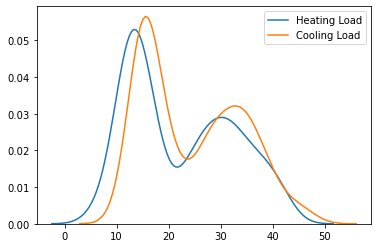

In [60]:
sns.kdeplot(df['Heating Load'])
sns.kdeplot(df['Cooling Load'])

Each of the values seem to follow a Bimodal distribution, where there are two peaks. It also seems as though the heating and cooling values are roughly the same, with the Cooling load being slightly higher. Next, we can look at a scatterplot with colors that correspond to an independent variable

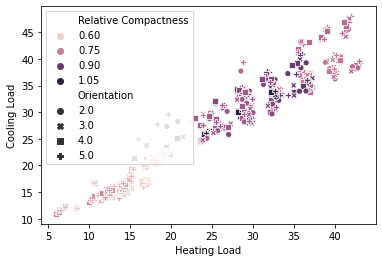

In [65]:
sns.scatterplot(data = df, x="Heating Load", y ='Cooling Load', hue="Relative Compactness", style = "Orientation")

The above plot has a few take aways. One being that the orientation seems to spread evenly across the different values, whereas the relative compactness seems to have two takeaways. The lower .60 value is centered around lower heating and cooling loads, while 0.75 seems to be centered around the higher values. The larger relative compactness values seem to be in the middle of the lower values. A similar graph can be created with the size attribute set too surface area which shows:

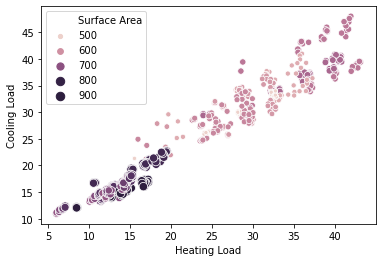

In [71]:
sns.scatterplot(data = df, x="Heating Load", y ='Cooling Load', size="Surface Area", hue="Surface Area")

That the larger surface area values are centered around lower heating and cooling loads, while the smaller values seem to be generally distributed, with a slight chunk of the 700 surface areas centered around the high values.

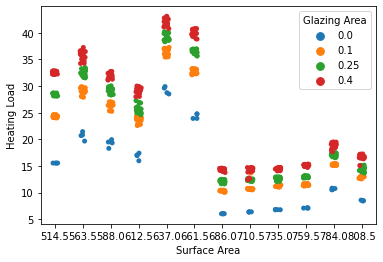

In [76]:
sns.stripplot(data = df, x="Surface Area", y ='Heating Load', jitter=True, hue= 'Glazing Area')

Using the surface area to group each building shape, we can then show how much the glazing area can affect the Heat Load. For each of the building shapes as Glazing Area increases the Heating Load increases. Next, we will look at these relationships using linear modelling. The first model will use all the values to see if there are any variables that seem to have no affect.

In [82]:
X=df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution']]
Y=df['Heating Load']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                                 OLS Regression Results                                
Dep. Variable:           Heating Load   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7347.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                        0.00
Time:                        14:15:41   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3858.
Df Residuals:                     761   BIC:                                      3891.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

There are a few takeaways from this model. First, the R^2 value is 0.985 which can be interpreted as the model predicts 98.5% of the variation in the dependent variable. All the variables, except orientation, have small p-values/ large absolute values of T values. From that, we remove the orientation variable and rerun the model.

In [88]:
X=df[['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Glazing Area',
       'Glazing Area Distribution']]
Y=df['Heating Load']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:           Heating Load   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8582.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                        0.00
Time:                        14:27:11   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3856.
Df Residuals:                     762   BIC:                                      3884.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Overall, there is very little difference in the values. When looking at the coefficients one could summarize relative Compactness effect by saying, the model predicts that for every 1-unit change in compactness the Heating Load will decrease by 20 units at a 95% confidence interval. Another thing to note is that the second warning suggests that there may be strong multicollinearity between the variables. This makes since, as Glazing Area Distribution is likely directly related to Glazing Area and the size dimensions. Also, relative compactness is likely a computation from the other size dimensions. By removing more variables, we may be able to remove that issue.

In [103]:
X=df[['Relative Compactness','Overall Height', 'Glazing Area']]
Y=df['Heating Load']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:           Heating Load   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.446e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                        0.00
Time:                        15:08:04   Log-Likelihood:                         -1988.6
No. Observations:                 768   AIC:                                      3983.
Df Residuals:                     765   BIC:                                      3997.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Using only relative compactness, overall height, and glazing area, the R^2 has relatively no change and the multicollinearity warning is no longer showing.

## Conclusion

From the models explored above, one can see that the Relative Compactness, Overall Height, and Glazing Area have the largest impact on a per unit change to Heating Load, and most likely Cooling Load if the relationship between those two variables seen in the earlier visualizations hold true. All the variables have statistically significant effects at the 95% confidence interval on Heating Load, except for orientation, which was not statistically significant.